# Overlaying in-vitro derived signatures

* following visualisation in 2024-12-07_Visualising-cleanv2.jpynb
* now overlaying my sig of tumour uptake and other in vitro signatures

# Set up workspace:

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import dandelion as ddl
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

### Overlay my tumour uptake signature: 

In [5]:
#make an object with my sig - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [6]:
#score genes
sc.tl.score_genes(data, Uptake_sig, score_name='Uptake_score')

In [10]:
colour_vars = ["Uptake_score","NR_annotations_simple"]

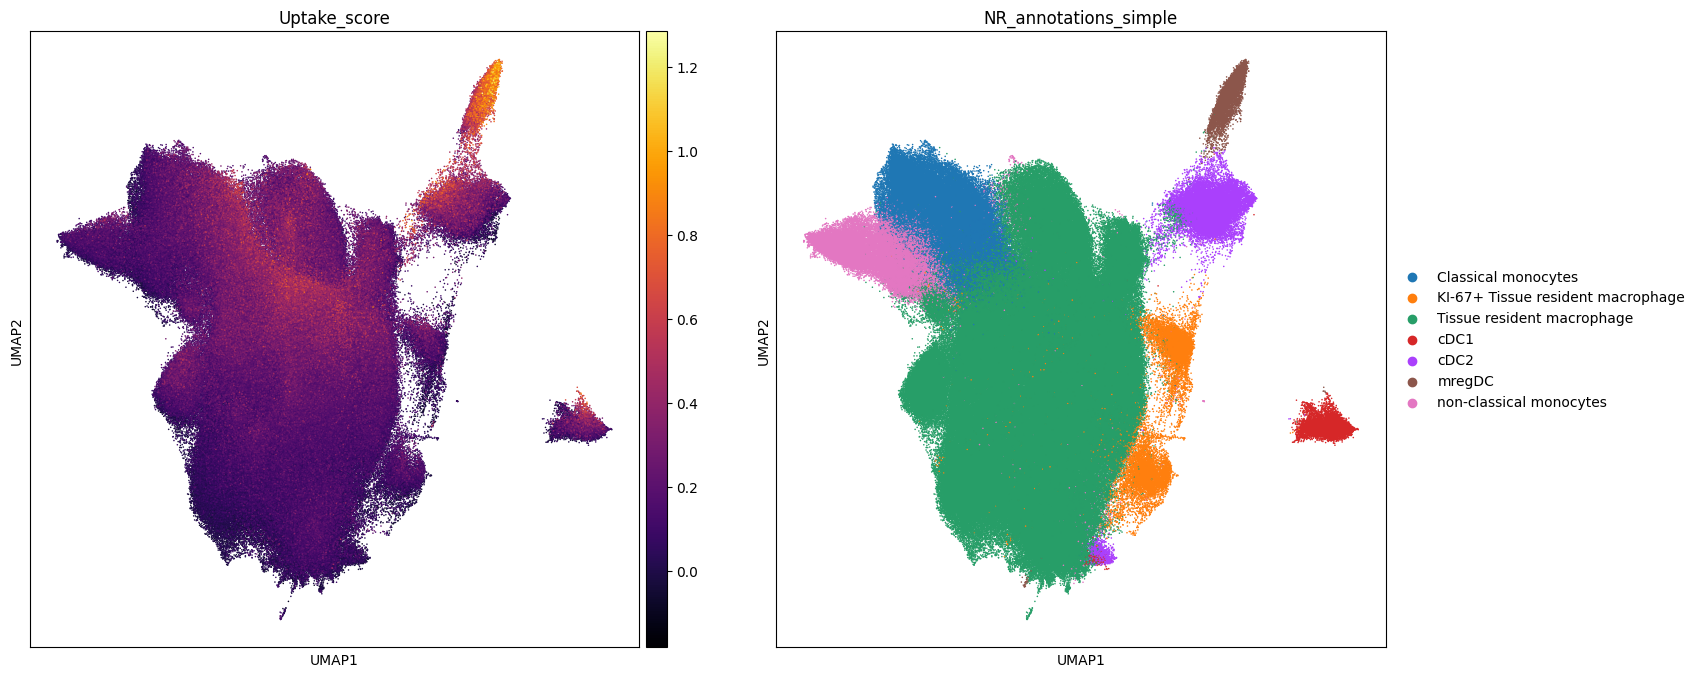

In [11]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

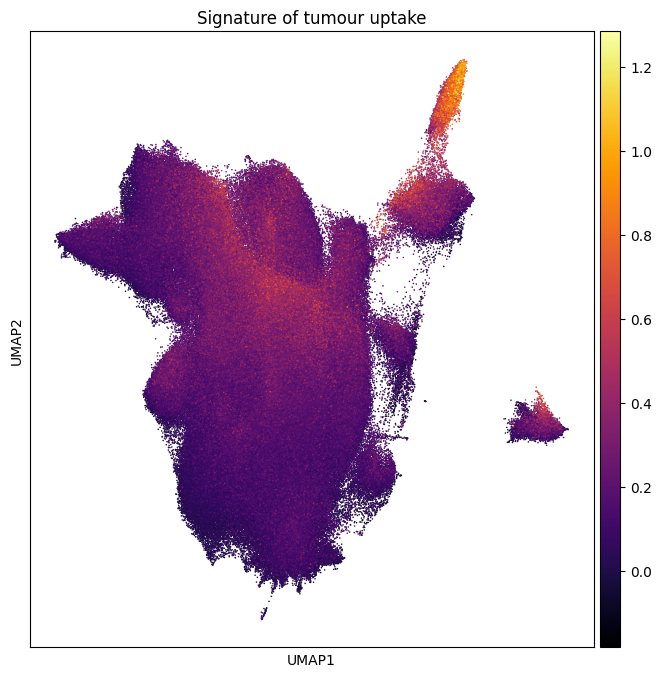

In [22]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color="Uptake_score", ncols=1, size=5, color_map="inferno",title="Signature of tumour uptake")

In [76]:
# Calculate the mean scores for each cluster
cluster_labels = data.obs['NR_annotations_simple']
uptake_scores = data.obs['Uptake_score']

In [77]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_scores': uptake_scores.groupby(cluster_labels).mean(),
})

/scratch/temp/11946017/ipykernel_3964428/2766785551.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


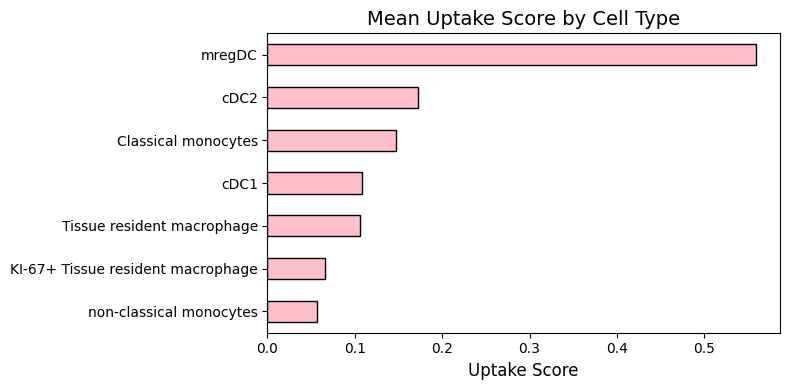

In [78]:
# Plot as a horizontal bar chart
plt.figure(figsize=(8, 4))
scores_df['Uptake_scores'].sort_values().plot.barh(
    color='pink', edgecolor='black', legend=False
)
plt.title("Mean Uptake Score by Cell Type", fontsize=14)
plt.xlabel("Uptake Score", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

### From the above two figures we can see that our in vitro signature aligns with mregDC. While there is enrichment for the signature in other areas of the plot, which may represent populations taking up tumour, the signature as a whole appears very distinct and highly enriched by mregDC

### split by cancer subtype, seperated by sample type

In [9]:
#make sub-objects for primary, mets, and healthy
#make OC object

data_primary = data[data.obs["sample_type_major2"] == "primary tumour"]
data_mets = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_OC = data[data.obs["cancer_with_H"] == "HGSOC"]

/scratch/temp/11946017/ipykernel_3964428/2343880045.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


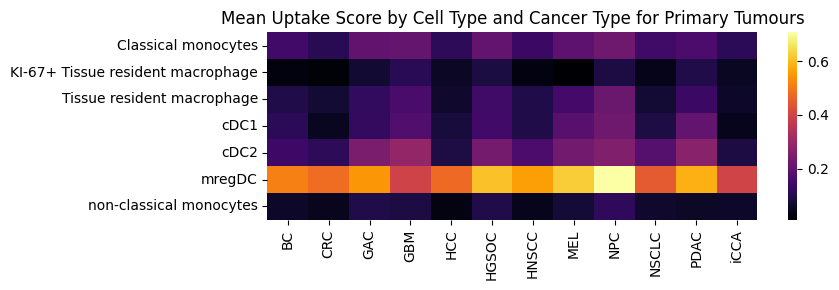

In [80]:
#Primary:

# Calculate the mean scores for each cancer type
cell_types = data_primary.obs['NR_annotations_simple']
cancer_types = data_primary.obs['cancer_broadest']
uptake_scores = data_primary.obs['Uptake_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_scores': uptake_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(9, 3))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Cancer Type for Primary Tumours', fontsize=12)
plt.tight_layout()
plt.show()

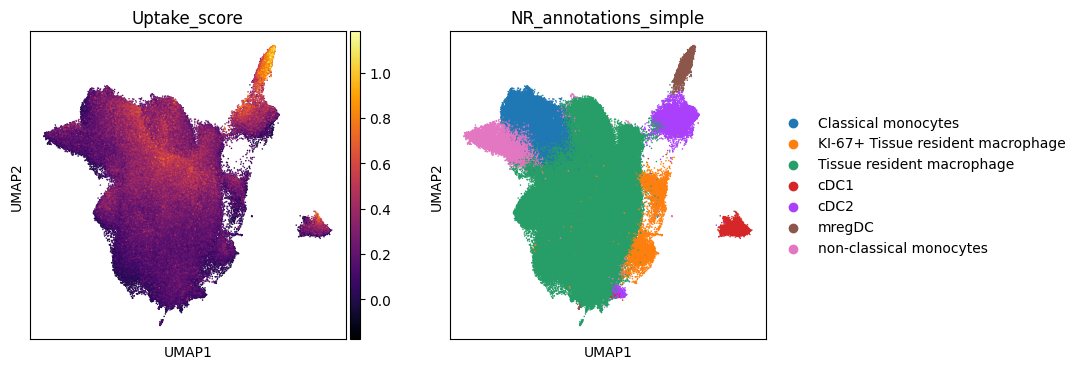

In [81]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_primary, color=colour_vars, ncols=2, size=5, color_map="inferno")

/scratch/temp/11946017/ipykernel_3964428/2329997873.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


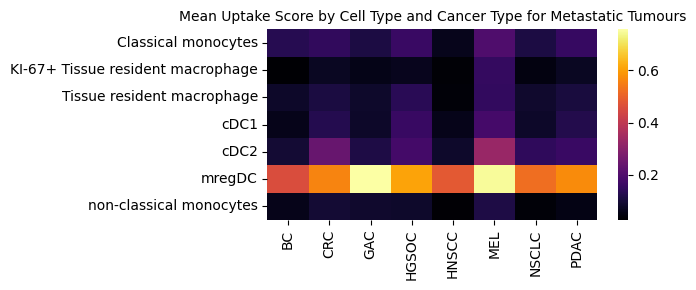

In [82]:
#Mets:

# Calculate the mean scores for each cancer type
cell_types = data_mets.obs['NR_annotations_simple']
cancer_types = data_mets.obs['cancer_broadest']
uptake_scores = data_mets.obs['Uptake_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_scores': uptake_scores.groupby([cancer_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Cancer Type for Metastatic Tumours', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

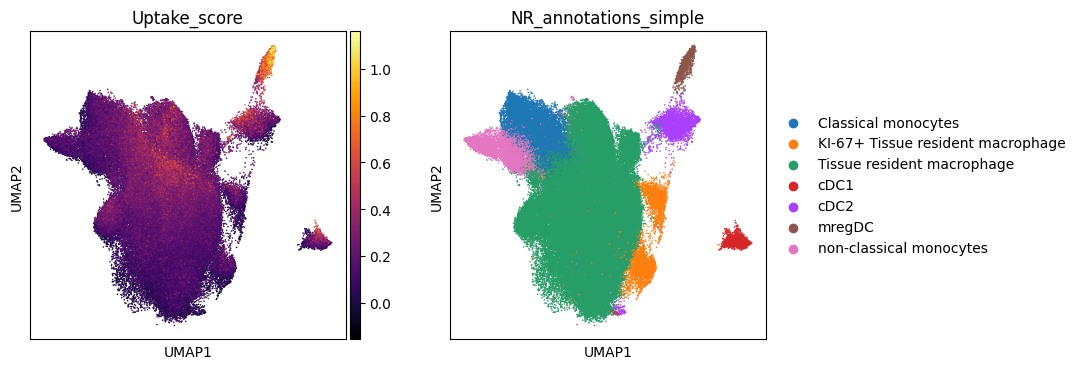

In [83]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_mets, color=colour_vars, ncols=2, size=5, color_map="inferno")

### Furthermore, we can see the signature is enriched in mregDC across all the cancer types in primary and metastatic tissues. Although to varying levels - however may not be able to directly compare given differing numbers of cells per group and different tissue sites (eg. met melanoma is LN)

* most enriched in the top half of mregDC which from Cheng gene set was the DC1 derived - makes sense 

/scratch/temp/11946017/ipykernel_3964428/3328096986.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


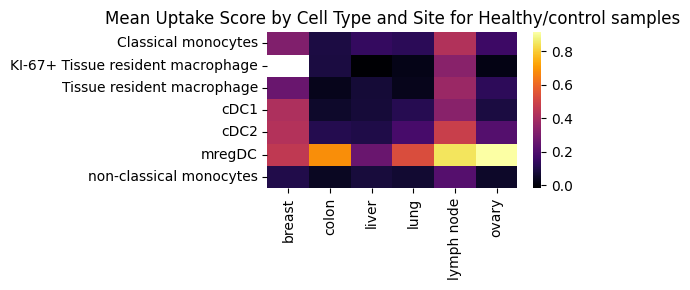

In [84]:
#Healthy:

# Calculate the mean scores for each site
cell_types = data_H.obs['NR_annotations_simple']
site = data_H.obs['site']
uptake_scores = data_H.obs['Uptake_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_scores': uptake_scores.groupby([site, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Site for Healthy/control samples', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

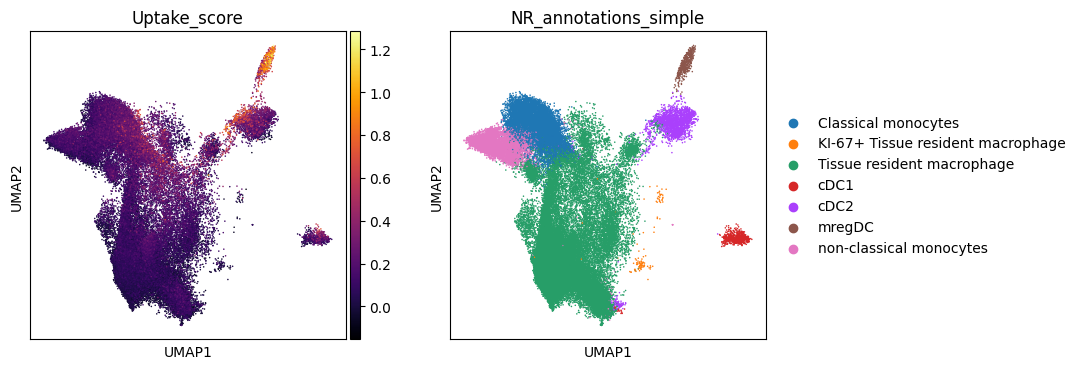

In [85]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_H, color=colour_vars, ncols=2, size=5, color_map="inferno")

In [40]:
# check
counts = data_H.obs['cancer_with_H'].value_counts()
print(counts)

cancer_with_H
NSCLC            55956
HCC               3279
HGSOC             1249
Melanoma          1082
CRC                926
Breast Cancer      807
iCCA               110
Name: count, dtype: int64


In [41]:
# check
counts = data_H.obs['site'].value_counts()
print(counts)

site
lung          55956
liver          3389
ovary          1249
lymph node     1082
colon           926
breast          807
Name: count, dtype: int64


In [86]:
#split by site:
data_H_lung = data_H[data_H.obs["site"] == "lung"]
data_H_liver = data_H[data_H.obs["site"] == "liver"]
data_H_ovary = data_H[data_H.obs["site"] == "ovary"]
data_H_LN = data_H[data_H.obs["site"] == "lymph node"]
data_H_colon = data_H[data_H.obs["site"] == "colon"]
data_H_breast = data_H[data_H.obs["site"] == "breast"]

##### Sites of healthy samples
* NSCLC - lung
* HCC - liver
* HGSOC - ovary
* Melanoma - uninvolved lymph node
* CRC - colon
* Breast cancer - Breast
* iCCA - liver 

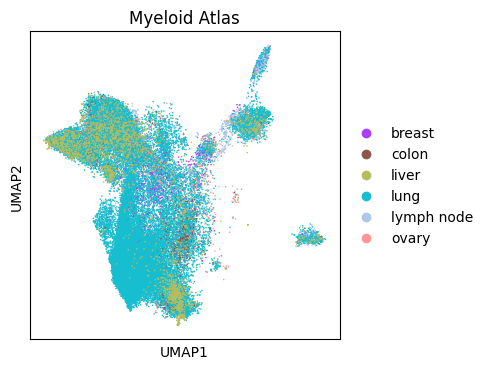

In [87]:
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_H, color="site", size=5, title="Myeloid Atlas")

In [88]:
#define function
def cluster_small_multiples(
    data_int, clust_key, size=25, frameon=False, legend_loc=None, **kwargs
):
    tmp = data_int.copy()

    for i, clust in enumerate(data_int.obs[clust_key].cat.categories):
        tmp.obs[clust] = data_int.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", data_int.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=data_int.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs
    )

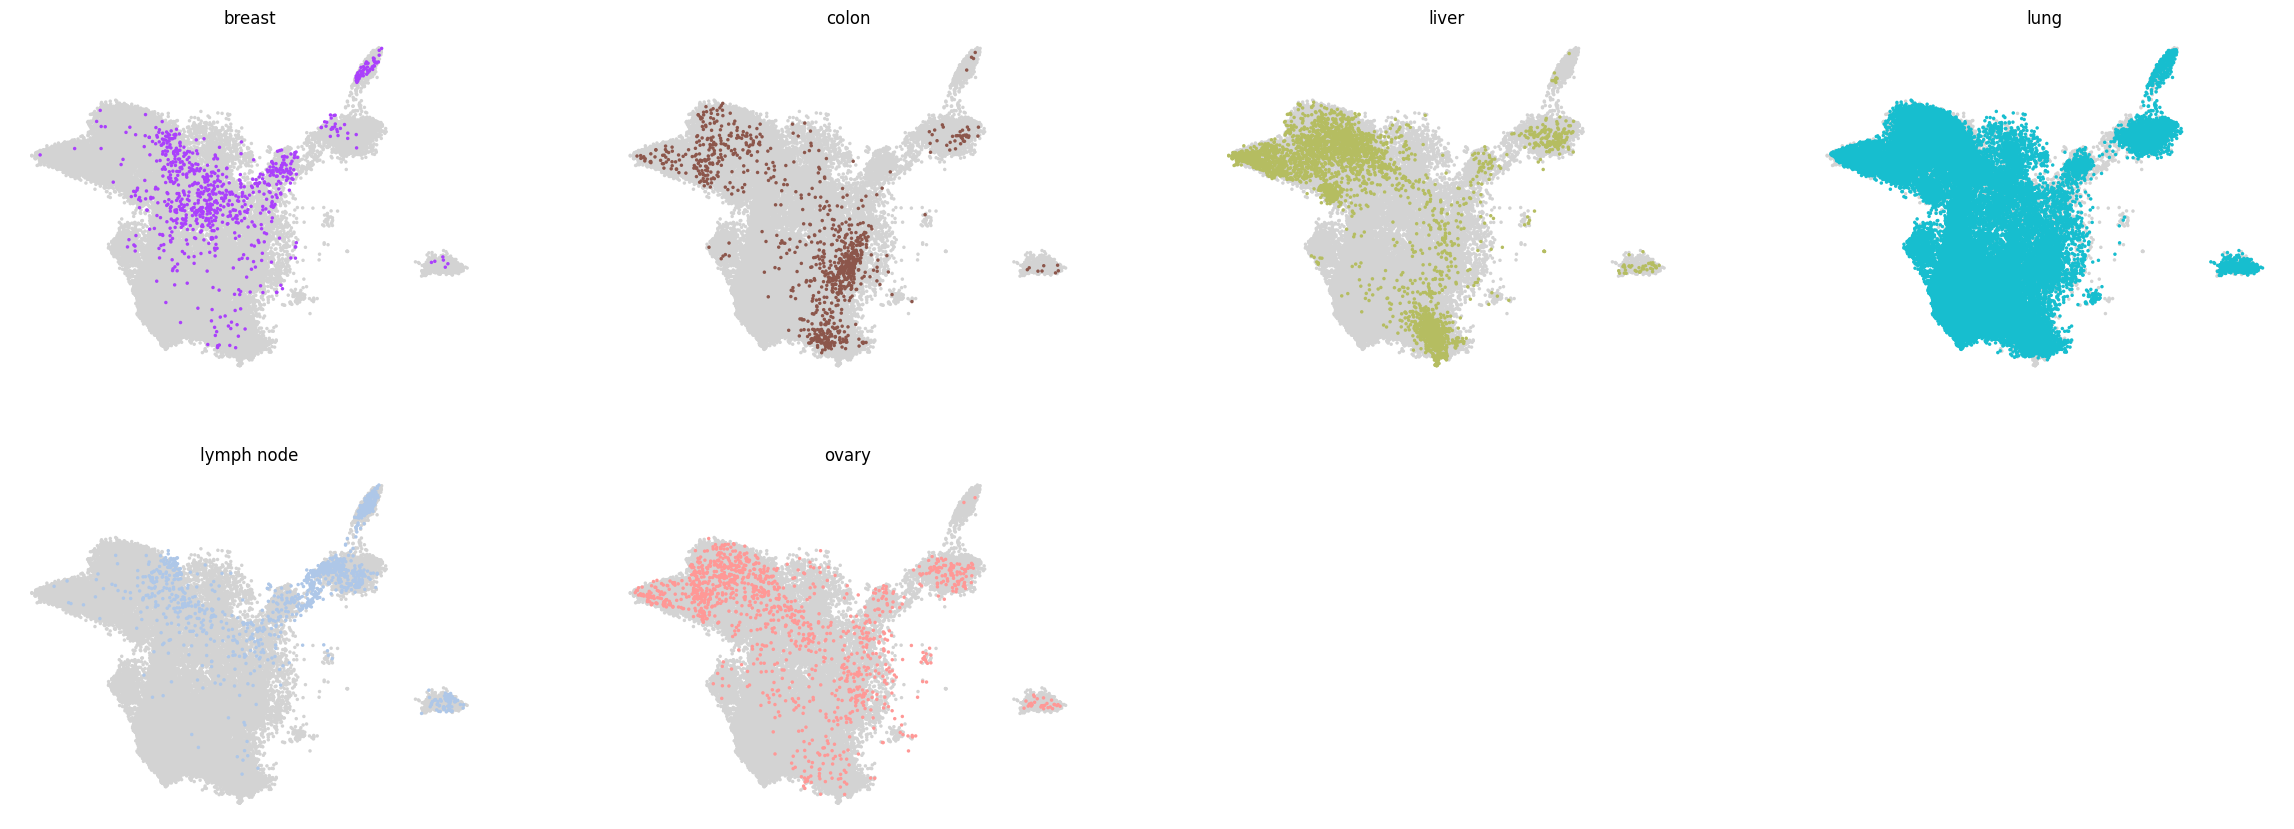

In [89]:
cluster_small_multiples(data_H, "site")

In [90]:
colour_vars = ["Uptake_score"]

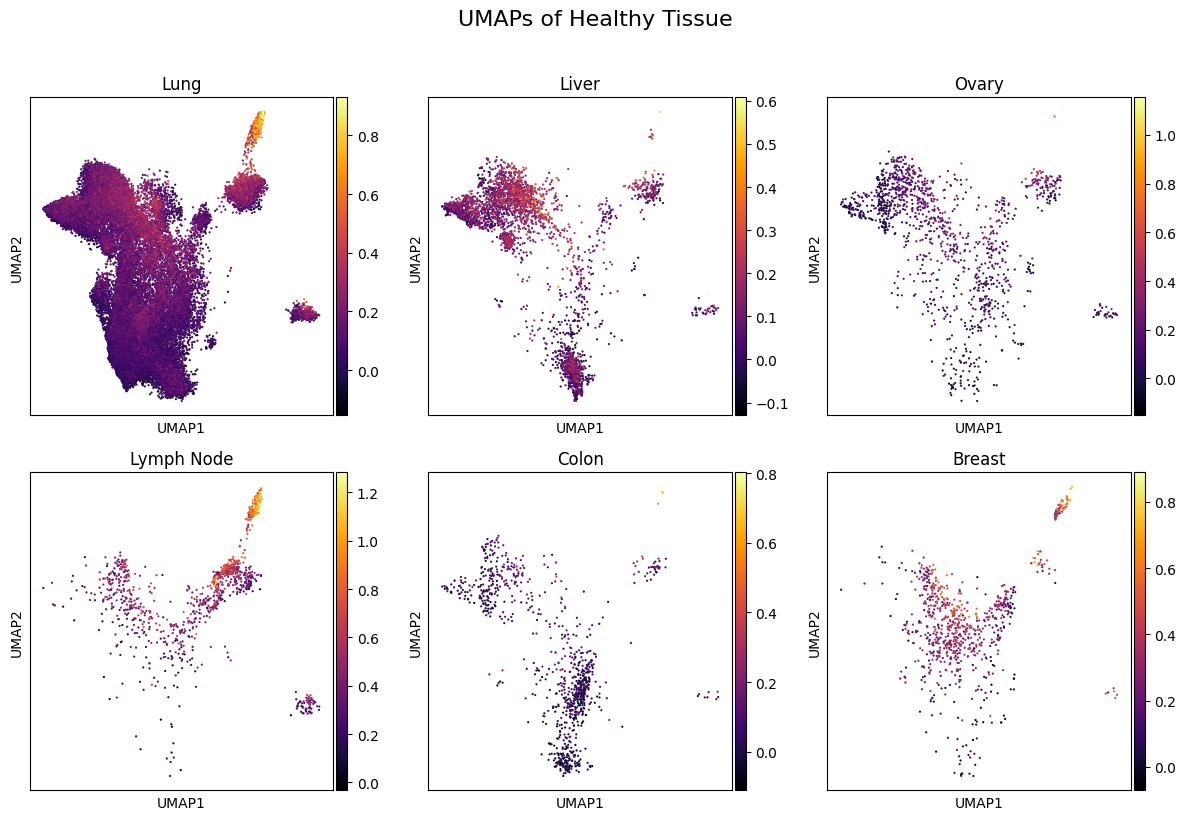

In [91]:
# Define datasets and titles
datasets = [
    (data_H_lung, "Lung"),
    (data_H_liver, "Liver"),
    (data_H_ovary, "Ovary"),
    (data_H_LN, "Lymph Node"),
    (data_H_colon, "Colon"),
    (data_H_breast, "Breast"),
]

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each dataset
for ax, (dataset, title) in zip(axes, datasets):
    sc.pl.umap(
        dataset,
        color=colour_vars,
        ncols=2,  # Use two columns for color variables per UMAP
        size=10,
        color_map="inferno",
        ax=ax,  # Render into specific subplot
        show=False,  # Avoid showing each plot separately
    )
    ax.set_title(title, fontsize=12)

# Adjust layout and add a global title
plt.suptitle("UMAPs of Healthy Tissue", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### However, importantly the signature/mregDC are  present among healthy tissues, supporting current literature that it is not a cancer specific phenomena. However this did differ considerably between sites and majorly limited by the small number of cells we have for healthy samples. mregDC were observed in lung, breast, and LN (uninvolved LN from melanoma patients), however there was limited mregDC observed in liver, ovary, or colon - link to figure generated in previous notebook showing box plots of DC proportions in healthy tissue

* except from proportions looks like not there in lung/ very low proportion, but I can see them above, just because I have way more cells???
* because of this can I really say liver/ovary/colon don't have mregDC? or do I just not have enough cells

/scratch/temp/11946017/ipykernel_3964428/1812612938.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


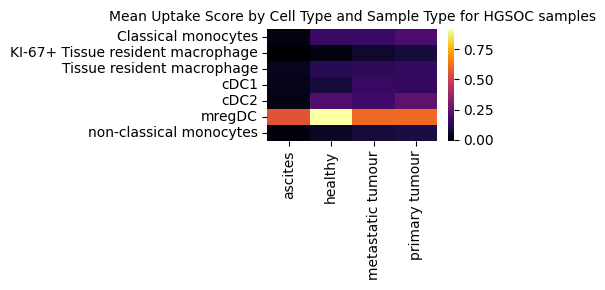

In [92]:
#OC:

# Calculate the mean scores for each cancer type
cell_types = data_OC.obs['NR_annotations_simple']
sample_types = data_OC.obs['sample_type_major2']
uptake_scores = data_OC.obs['Uptake_score']

# Create a DataFrame with the mean scores per cell type and cancer type
scores_df = pd.DataFrame({
    'Uptake_scores': uptake_scores.groupby([sample_types, cell_types]).mean(),
})

# Pivot the DataFrame to have cancer types as columns and cell types as rows
scores_df = scores_df.unstack(level=1).T  # Unstack cancer types to columns, leaving cell types as rows

# Remove the "Uptake_score" prefix from the row labels
scores_df.index = scores_df.index.droplevel(0)  # Drop the first level of the index (Uptake_score)

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(scores_df, cmap='inferno', annot=False, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Mean Uptake Score by Cell Type and Sample Type for HGSOC samples', fontsize=10)

# Rotate the x-axis labels to vertical
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### ^ this healthy above is like 1 cell :()

# Repeat plotting on a per sample basis

## Primary:

In [93]:
custom_order = ['HGSOC','BC','CRC','GAC','GBM','HCC','HNSCC','MEL','NPC','NSCLC','PDAC','iCCA']

In [94]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/in-vitro_overlays')
os.getcwd()

'/scratch/user/s4436039/scdata/in-vitro_overlays'

In [95]:
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]

data_DC1 = data_P[data_P.obs["NR_annotations_simple"] == "cDC1"]
data_DC2 = data_P[data_P.obs["NR_annotations_simple"] == "cDC2"]
data_mregDC = data_P[data_P.obs["NR_annotations_simple"] == "mregDC"]

In [104]:
data_DC1.obs["Uptake_score"]

GSE215120_AM1_ACCAGTAAGACTGGGT-1                                         0.399827
GSE215120_AM1_ACGTCAACAAGGACTG-1                                         0.275272
GSE215120_AM1_ATAACGCGTAGCGCTC-1                                         0.173609
GSE215120_AM1_ATAGACCCATTACCTT-1                                         0.184995
GSE215120_AM1_ATTGGTGAGTCTCGGC-1                                         0.237733
                                                                           ...   
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_LEFT_ADNEXA_TTTCAGTGTCCGACGT    0.054745
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_AGGGTTTAGGTCACAG    -0.019582
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTCATGCTCGTTAGAC    -0.004660
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GAGGGATCAAGCGCTC     0.199856
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC     0.186365
Name: Uptake_score, Length: 3582, dtype: float64

In [97]:
score_column = "Uptake_score"

In [111]:
#DC1: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC1 = data_DC1.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_DC1 = score_DC1.merge(
    data_DC1.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC1['replicate'] = score_DC1.groupby('cancer_broadest').cumcount()
pivoted_df_DC1 = score_DC1.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_DC1 = pivoted_df_DC1.reindex(custom_order)
pivoted_df_DC1.shape

/scratch/temp/11946017/ipykernel_3964428/800188655.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946017/ipykernel_3964428/800188655.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 96)

In [112]:
#DC2: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC2 = data_DC2.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_DC2 = score_DC2.merge(
    data_DC2.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC2['replicate'] = score_DC2.groupby('cancer_broadest').cumcount()
pivoted_df_DC2 = score_DC2.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_DC2 = pivoted_df_DC2.reindex(custom_order)
pivoted_df_DC2.shape

/scratch/temp/11946017/ipykernel_3964428/3598100514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946017/ipykernel_3964428/3598100514.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 98)

In [113]:
#mregDC: 

# Group by 'integration_id' and calculate the mean score for each group
score_mregDC = data_mregDC.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_mregDC = score_mregDC.merge(
    data_mregDC.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_mregDC['replicate'] = score_mregDC.groupby('cancer_broadest').cumcount()
pivoted_df_mregDC = score_mregDC.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_mregDC = pivoted_df_mregDC.reindex(custom_order)
pivoted_df_mregDC.shape

/scratch/temp/11946017/ipykernel_3964428/554344926.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946017/ipykernel_3964428/554344926.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 97)

In [114]:
save_name = "Uptake_scores.xlsx"

with pd.ExcelWriter(save_name) as writer:
    pivoted_df_DC1.to_excel(writer, sheet_name='DC1')
    pivoted_df_DC2.to_excel(writer, sheet_name='DC2')
    pivoted_df_mregDC.to_excel(writer, sheet_name='mregDC')

# Mets: 

In [10]:
custom_order = ['HGSOC','BC','CRC','GAC','GBM','HCC','HNSCC','MEL','NPC','NSCLC','PDAC','iCCA']

In [11]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/in-vitro_overlays')
os.getcwd()

'/scratch/user/s4436039/scdata/in-vitro_overlays'

In [12]:
data_M = data[data.obs["sample_type_major2"] == "metastatic tumour"]

data_DC1 = data_M[data_M.obs["NR_annotations_simple"] == "cDC1"]
data_DC2 = data_M[data_M.obs["NR_annotations_simple"] == "cDC2"]
data_mregDC = data_M[data_M.obs["NR_annotations_simple"] == "mregDC"]

In [13]:
data_DC1.obs["Uptake_score"]

GSE215120_CM1_mets_ACCCTCAGTACAACGG-1                                         -0.044016
GSE215120_CM1_mets_ACCCTTGGTGATACAA-1                                          0.151554
GSE215120_CM1_mets_ACTCTCGGTCCCTAAA-1                                          0.194847
GSE215120_CM1_mets_AGCGCTGCACCCTAAA-1                                          0.110510
GSE215120_CM1_mets_CAGGCCACACTCACTC-1                                          0.338660
                                                                                 ...   
GSE180661_HGSOC_SPECTRUM-OV-009_S1_CD45P_PELVIC_PERITONEUM_TGCAGGCTCGAACCAT    0.050774
GSE180661_HGSOC_SPECTRUM-OV-009_S1_CD45P_PELVIC_PERITONEUM_TTACGTTTCGGCATCG   -0.032274
GSE180661_HGSOC_SPECTRUM-OV-009_S1_CD45P_PELVIC_PERITONEUM_TTGTGTTCAAAGCAAT    0.059419
GSE180661_HGSOC_SPECTRUM-OV-009_S1_CD45P_PELVIC_PERITONEUM_TTTAGTCCACGCAAAG    0.189730
GSE180661_HGSOC_SPECTRUM-OV-009_S1_CD45P_PELVIC_PERITONEUM_TTTGATCAGGGTGAAA    0.174197
Name: Uptake_score, Length: 1414

In [14]:
score_column = "Uptake_score"

In [15]:
#DC1: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC1 = data_DC1.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_DC1 = score_DC1.merge(
    data_DC1.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC1['replicate'] = score_DC1.groupby('cancer_broadest').cumcount()
pivoted_df_DC1 = score_DC1.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_DC1 = pivoted_df_DC1.reindex(custom_order)
pivoted_df_DC1.shape

/scratch/temp/11946176/ipykernel_892402/800188655.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/800188655.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 72)

In [16]:
#DC2: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC2 = data_DC2.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_DC2 = score_DC2.merge(
    data_DC2.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC2['replicate'] = score_DC2.groupby('cancer_broadest').cumcount()
pivoted_df_DC2 = score_DC2.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_DC2 = pivoted_df_DC2.reindex(custom_order)
pivoted_df_DC2.shape

/scratch/temp/11946176/ipykernel_892402/3598100514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/3598100514.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 73)

In [17]:
#mregDC: 

# Group by 'integration_id' and calculate the mean score for each group
score_mregDC = data_mregDC.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_broadest' by matching the 'integration_id'
score_mregDC = score_mregDC.merge(
    data_mregDC.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_mregDC['replicate'] = score_mregDC.groupby('cancer_broadest').cumcount()
pivoted_df_mregDC = score_mregDC.pivot(index='cancer_broadest', columns='replicate', values=score_column)

# Reindex the rows based on custom order
pivoted_df_mregDC = pivoted_df_mregDC.reindex(custom_order)
pivoted_df_mregDC.shape

/scratch/temp/11946176/ipykernel_892402/554344926.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/554344926.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(12, 72)

In [18]:
save_name = "Uptake_scores_metastatic.xlsx"

with pd.ExcelWriter(save_name) as writer:
    pivoted_df_DC1.to_excel(writer, sheet_name='DC1')
    pivoted_df_DC2.to_excel(writer, sheet_name='DC2')
    pivoted_df_mregDC.to_excel(writer, sheet_name='mregDC')

## Healthy: 

In [19]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/in-vitro_overlays')
os.getcwd()

'/scratch/user/s4436039/scdata/in-vitro_overlays'

In [20]:
data_H = data[data.obs["sample_type_major2"] == "healthy"]

data_DC1 = data_H[data_H.obs["NR_annotations_simple"] == "cDC1"]
data_DC2 = data_H[data_H.obs["NR_annotations_simple"] == "cDC2"]
data_mregDC = data_H[data_H.obs["NR_annotations_simple"] == "mregDC"]

In [21]:
data_DC1.obs["Uptake_score"]

GSE154826_D1_AACCGCGAGAAGGGTA-1             0.230091
GSE154826_D1_ACATCAGGTCTGCAAT-1             0.430340
GSE154826_D1_ACTGATGCATAGGATA-1             0.257463
GSE154826_D1_AGGCCACAGCATCATC-1             0.097235
GSE154826_D1_CACACTCAGATGTGTA-1             0.239106
                                              ...   
GSE189903_4HN_GGCTGGTGTTACGCGC-1            0.172346
GSE189903_4HN_TACGGGCAGTCAAGGC-1            0.086818
GSE189903_4HN_TGACGGCCATCCTTGC-1            0.202870
GSE162498_Healthy_P60_AACTGGTGTGAAAGAG-1    0.446055
GSE162498_Healthy_P61_GATGAAAAGAGACTTA-1    0.381706
Name: Uptake_score, Length: 709, dtype: float64

In [22]:
score_column = "Uptake_score"

In [ ]:
#DC1: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC1 = data_DC1.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'site' by matching the 'integration_id'
score_DC1 = score_DC1.merge(
    data_DC1.obs[["integration_id", "site", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC1['replicate'] = score_DC1.groupby('site').cumcount()
pivoted_df_DC1 = score_DC1.pivot(index='site', columns='replicate', values=score_column)

pivoted_df_DC1.shape

/scratch/temp/11946176/ipykernel_892402/919758181.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/919758181.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(6, 33)

In [25]:
#DC2: 

# Group by 'integration_id' and calculate the mean score for each group
score_DC2 = data_DC2.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'site' by matching the 'integration_id'
score_DC2 = score_DC2.merge(
    data_DC2.obs[["integration_id", "site", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC2['replicate'] = score_DC2.groupby('site').cumcount()
pivoted_df_DC2 = score_DC2.pivot(index='site', columns='replicate', values=score_column)

pivoted_df_DC2.shape

/scratch/temp/11946176/ipykernel_892402/1199560869.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/1199560869.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(6, 34)

In [26]:
#mregDC: 

# Group by 'integration_id' and calculate the mean score for each group
score_mregDC = data_mregDC.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'site' by matching the 'integration_id'
score_mregDC = score_mregDC.merge(
    data_mregDC.obs[["integration_id", "site", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_mregDC['replicate'] = score_mregDC.groupby('site').cumcount()
pivoted_df_mregDC = score_mregDC.pivot(index='site', columns='replicate', values=score_column)

pivoted_df_mregDC.shape

/scratch/temp/11946176/ipykernel_892402/1161197235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/11946176/ipykernel_892402/1161197235.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(6, 32)

In [27]:
save_name = "Uptake_scores_healthy.xlsx"

with pd.ExcelWriter(save_name) as writer:
    pivoted_df_DC1.to_excel(writer, sheet_name='DC1')
    pivoted_df_DC2.to_excel(writer, sheet_name='DC2')
    pivoted_df_mregDC.to_excel(writer, sheet_name='mregDC')

### For each cancer type I want to export a count of how many cDC1, cDC2 and mregDC per sample

# Repeat above process with in-vitro signatures from Liam 
* from DC1 bulk sequencing RQ4 2024

In [ ]:
# make objects with sigs
IFNbCD40_4 = ['IFI44L','DDX60','IFI44','IFIT1','CXCL10','HERC5','CXCL9','RSAD2','PDGFRL','IFIT3','OTOF','CXCL11','APOBEC3A','DDX60L','IFIT2','SERPING1','USP18','IFI27','ELOVL3','HERC6','XAF1','OAS3','ETV7','AL445490.1','TNFSF10','OAS2','ISG20','CCL8','KCTD14','SIDT1','ISG15','MX2','IFI6','AP001610.1','HELZ2','DDX58','MYH7','RUFY4','FXYD6','ALMS1P1','HESX1','OASL','MX1','CACNA1I','CMPK2','IFITM1','OAS1','CXCR2P1','BATF2','CCL2','IL12B','TBX1','BX255923.2','NUPR1','PRAL','APOL6','AL645608.7','IFNL3P1','PARP14','SLC25A3P1','NRIR','AP000757.1','AC112719.2','GCNT4','AMOTL2','SAA2','CFB','NAT8','LY6E','GBP4','SLC8A2','TFEC','RTP4','C5orf56','LGALS3BP','CD38','EPHB2','PAX5','AL133523.1','EPSTI1','STAT1','CASP10','STAP1','UBE2L6','GJA4','IFITM3','MNDA','NEXN','CCL13','LAMP3','SLC38A5','SMTNL1','EIF2AK2','TNFSF18','SLC1A3','TRIM14','ANO7L1','MBOAT4','SLFN5']
IFNb_4 = ['IFI44L','DDX60','IFI44','IFIT1','HERC5','OTOF','RSAD2','CXCL10','IFIT3','CXCL9','PDGFRL','DDX60L','SERPING1','APOBEC3A','IFI27','IFIT2','USP18','ELOVL3','CXCL11','XAF1','HERC6','AL445490.1','ETV7','OAS3','TNFSF10','ISG20','OAS2','ISG15','KCTD14','CCL8','SIDT1','MX2','IFI6','AP001610.1','MYH7','RUFY4','DDX58','BATF2','HELZ2','HESX1','OASL','CACNA1I','MX1','FXYD6','IFITM1','IFNL3P1','ALMS1P1','OAS1','CMPK2','TBX1','CXCR2P1','AP000757.1','NUPR1','CCL2','AL645608.7','APOL6','SLC8A2','RTP4','PARP14','LY6E','SLC25A3P1','LGALS3BP','C5orf56','NRIR','CFB','PAX5','GCNT4','CD38','MBOAT4','EPHB2','EPSTI1','PRAL','TRIM31','STAP1','UBE2L6','NAT8','CASP10','ANO7L1','TFEC','STAT1','IFITM3','MNDA','SLC38A5','TNFSF18','TRIM14','SMTNL1','AC136475.9','PZP','EIF2AK2','GBP4','SAA2','AL133523.1','AMOTL2','IRF6','DHX58','CCL13','KANK3','AC136475.5','IFI35']
IFNbCD40_18 = ['CBWD6','CCL19','IFI44L','IL12B','IFI27','CXCL11','CD70','EBI3','IFIT2','CCL5','NXPH3','ENTHD1','KCNK5','IFI44','CXCL9','IL27','IL2RA','COL5A3','GATA6','FXYD6','GNG4','LINC00158','CYP7B1','CXCL10','EXOC3L4','SERPING1','SLC1A3','ITGB8','PRAME','SLC6A12','TMCC2','CCL22','NUAK2','IFIT3','SYNPO','CD200','SYNM','TPPP','ACHE','MIR155HG','MATN2','SEMA4C','CFB','SYNPO2','UPB1','CD82','LAYN','ISG20','TNFAIP6','BHLHE22','ATOH8','SOCS2','LINC02154','C1orf61','EDARADD','MYO1B','HERC5','TCF7','IGSF3','SNN','JAG1','SLC6A13','HOPX','ANKRD33B','MGLL','OXTR','CCR7','TNFAIP3','TNFRSF9','KCNN1','SOCS2-AS1','AC003092.1','TNFAIP2','FAM186B','DDX60','FSCN1','NBL1','CCL13','CGN','ADORA2A','CAMK1G','IRF1','TREML1','GBP4','ADORA2A-AS1','BCL2A1','LRRC32','USP18','AC119427.1','XAF1','UNC13A','SIRPA','RSAD2','SEMA7A','GPR132','CITED4','ETV7','TNFSF9','SLC1A2']
IFNb_18 = ['IFI44L','IFI44','IFIT3','IFIT2','IFI27','RSAD2','SERPING1','CXCL11','CCL13','FXYD6','IFIT1','DDX60','CXCL10','XAF1','HERC5','RUFY4','USP18','CXCL9','DDX60L','CCL19','ISG20','CCL2','OAS2','HERC6','OASL','IFI6','OAS1','LGALS3BP','OAS3','RNF43','IFITM1','TNFSF10','HESX1','ISG15','GATA6','MYH7','ZNF385C','LINGO1','IFITM3','CFB','MX2','CMPK2','IL2RA','MX1','HELZ2','ETV7','ENTHD1','EXOC3L4','LY6E','CASP10','LILRA5','DDX58','KANK3','TFEC','MST1R','SYNPO2','GNG4','GBP4','SYNPO','STAT1','LINC00158','PRAME','CCR7','SLFN5','ANKRD33B','VTN','KCNN1','SEMA6B','NRXN2','FOXD4L1','C17orf99','LINC02154','DHX58','SIGLEC1','C1orf61','NID1','PLEKHG6','CLEC2D','IL4I1','AC119427.1','PHLDA1','DSP','AC003092.1','PELI2','SEMA4C','CCL5','NCF1B','NEURL3','RASGRP3','LIF','IL23R','LIPG','NUAK2','VANGL2','APOBEC3H','TMCC3','BATF2','TMEM51','STAP1']
IFNgCD40_18 = ['IL12B','BX255923.2','CXCL9','CCL5','CXCL11','LAYN','IL2RA','EBI3','IL27','CD70','EXOC3L4','LINC00158','ITGB8','CCL19','SYNPO2','GBP1','CXCL10','ENTHD1','GNG4','SLC6A12','GBP4','SLC1A3','NXPH3','C1orf61','SYNM','SERPING1','G0S2','PRAME','GBP5','COL5A3','CYP7B1','TMCC2','SEMA4C','KCNK5','GATA6','LINC02154','SYNPO','UPB1','ACHE','CD200','CFAP46','SLC6A13','ENTPD2','MIR155HG','NUAK2','CCL22','AC003092.1','FAM186B','UNC13A','TPPP','SOCS2-AS1','TNFAIP2','SOCS2','TNFAIP6','HOPX','TBX21','CAMK1G','ETV7','TNFAIP3','BHLHE22','IRF1','MGLL','FXYD6','CD82','SNN','EDARADD','JAG1','ISG20','SLC12A8','SLC1A2','ADORA2A-AS1','NBL1','ADORA2A','IGSF3','KCNN1','SAA1','MATN2','IL32','AC119427.1','OXTR','CGN','ASTL','ANKRD33B','ATOH8','BCL2A1','CFB','CCND2','CCR7','HAPLN3','GPR132','SEMA7A','PRR5L','TREML1','FSCN1','RAPGEF3','TCF7','IL4I1','LINC02541','TNFRSF9']
IFNg_18 = ['SERPING1','TBX21','CXCL9','CXCL11','GBP5','ETV7','RARRES3','IRF1','GBP2','IFIT2','RUFY4','GBP1','GBP4','LGALS3BP','SAMD4A','CCL19','HAPLN3','APOL6','HIVEP3','ISG20','SOCS1','CD7','ASCL2','GTF2IRD1','TGM2','LIF','CFB','AC003092.1','SLC6A12','STAT1','MYO7B','C5orf56','SECTM1','CD274','FOXC1','ABCC11','ALDH1A1','F3','CALHM6','LIPH','KIF5C','LDLRAD3','APBA2','WARS','VAMP5','LAP3','IDO1','ADGRB1','C1QB','IL15RA','UBE2L6','JAG1','TNFAIP2','NCF1C','MGLL','NCF1','BCL2A1','OPTN','BCL2L11','C1orf21','IL18BP','CD40','PARP14','EBF4','SOD2','ATF5','RUNX2','SFMBT2','EXT1','SLAMF7','IRF9','NLRC5','NFKBIZ','RNF213','BCL3','EPSTI1','SCARF1','ACSL1','ODF3B','NABP1','TXN','LINC-PINT','TYMP','TRAF3','STAT3']

In [ ]:
#Score cells 
sc.tl.score_genes(data, IFNbCD40_4, score_name='IFNbCD40_4_score')
sc.tl.score_genes(data, IFNb_4, score_name='IFNb_4_score')
sc.tl.score_genes(data, IFNbCD40_18, score_name='IFNbCD40_18_score')
sc.tl.score_genes(data, IFNb_18, score_name='IFNb_18_score')
sc.tl.score_genes(data, IFNgCD40_18, score_name='IFNgCD40_18_score')
sc.tl.score_genes(data, IFNg_18, score_name='IFNg_18_score')

       'PRAL', 'AL645608.7', 'IFNL3P1', 'SLC25A3P1', 'NRIR', 'AP000757.1',
       'AC112719.2', 'NAT8', 'C5orf56', 'AL133523.1', 'SMTNL1', 'ANO7L1'],
      dtype='object')
       'AP000757.1', 'AL645608.7', 'SLC25A3P1', 'C5orf56', 'NRIR', 'PRAL',
       'NAT8', 'ANO7L1', 'SMTNL1', 'AC136475.9', 'AL133523.1', 'AC136475.5'],
      dtype='object')
       'AC119427.1'],
      dtype='object')
       'ADORA2A-AS1', 'AC119427.1', 'LINC02541'],
      dtype='object')
       'LINC-PINT'],
      dtype='object')


In [13]:
colour_vars = ["IFNbCD40_4_score","IFNb_4_score","IFNbCD40_18_score","IFNb_18_score","IFNgCD40_18_score","IFNg_18_score","Uptake_score","NR_annotations_simple"]

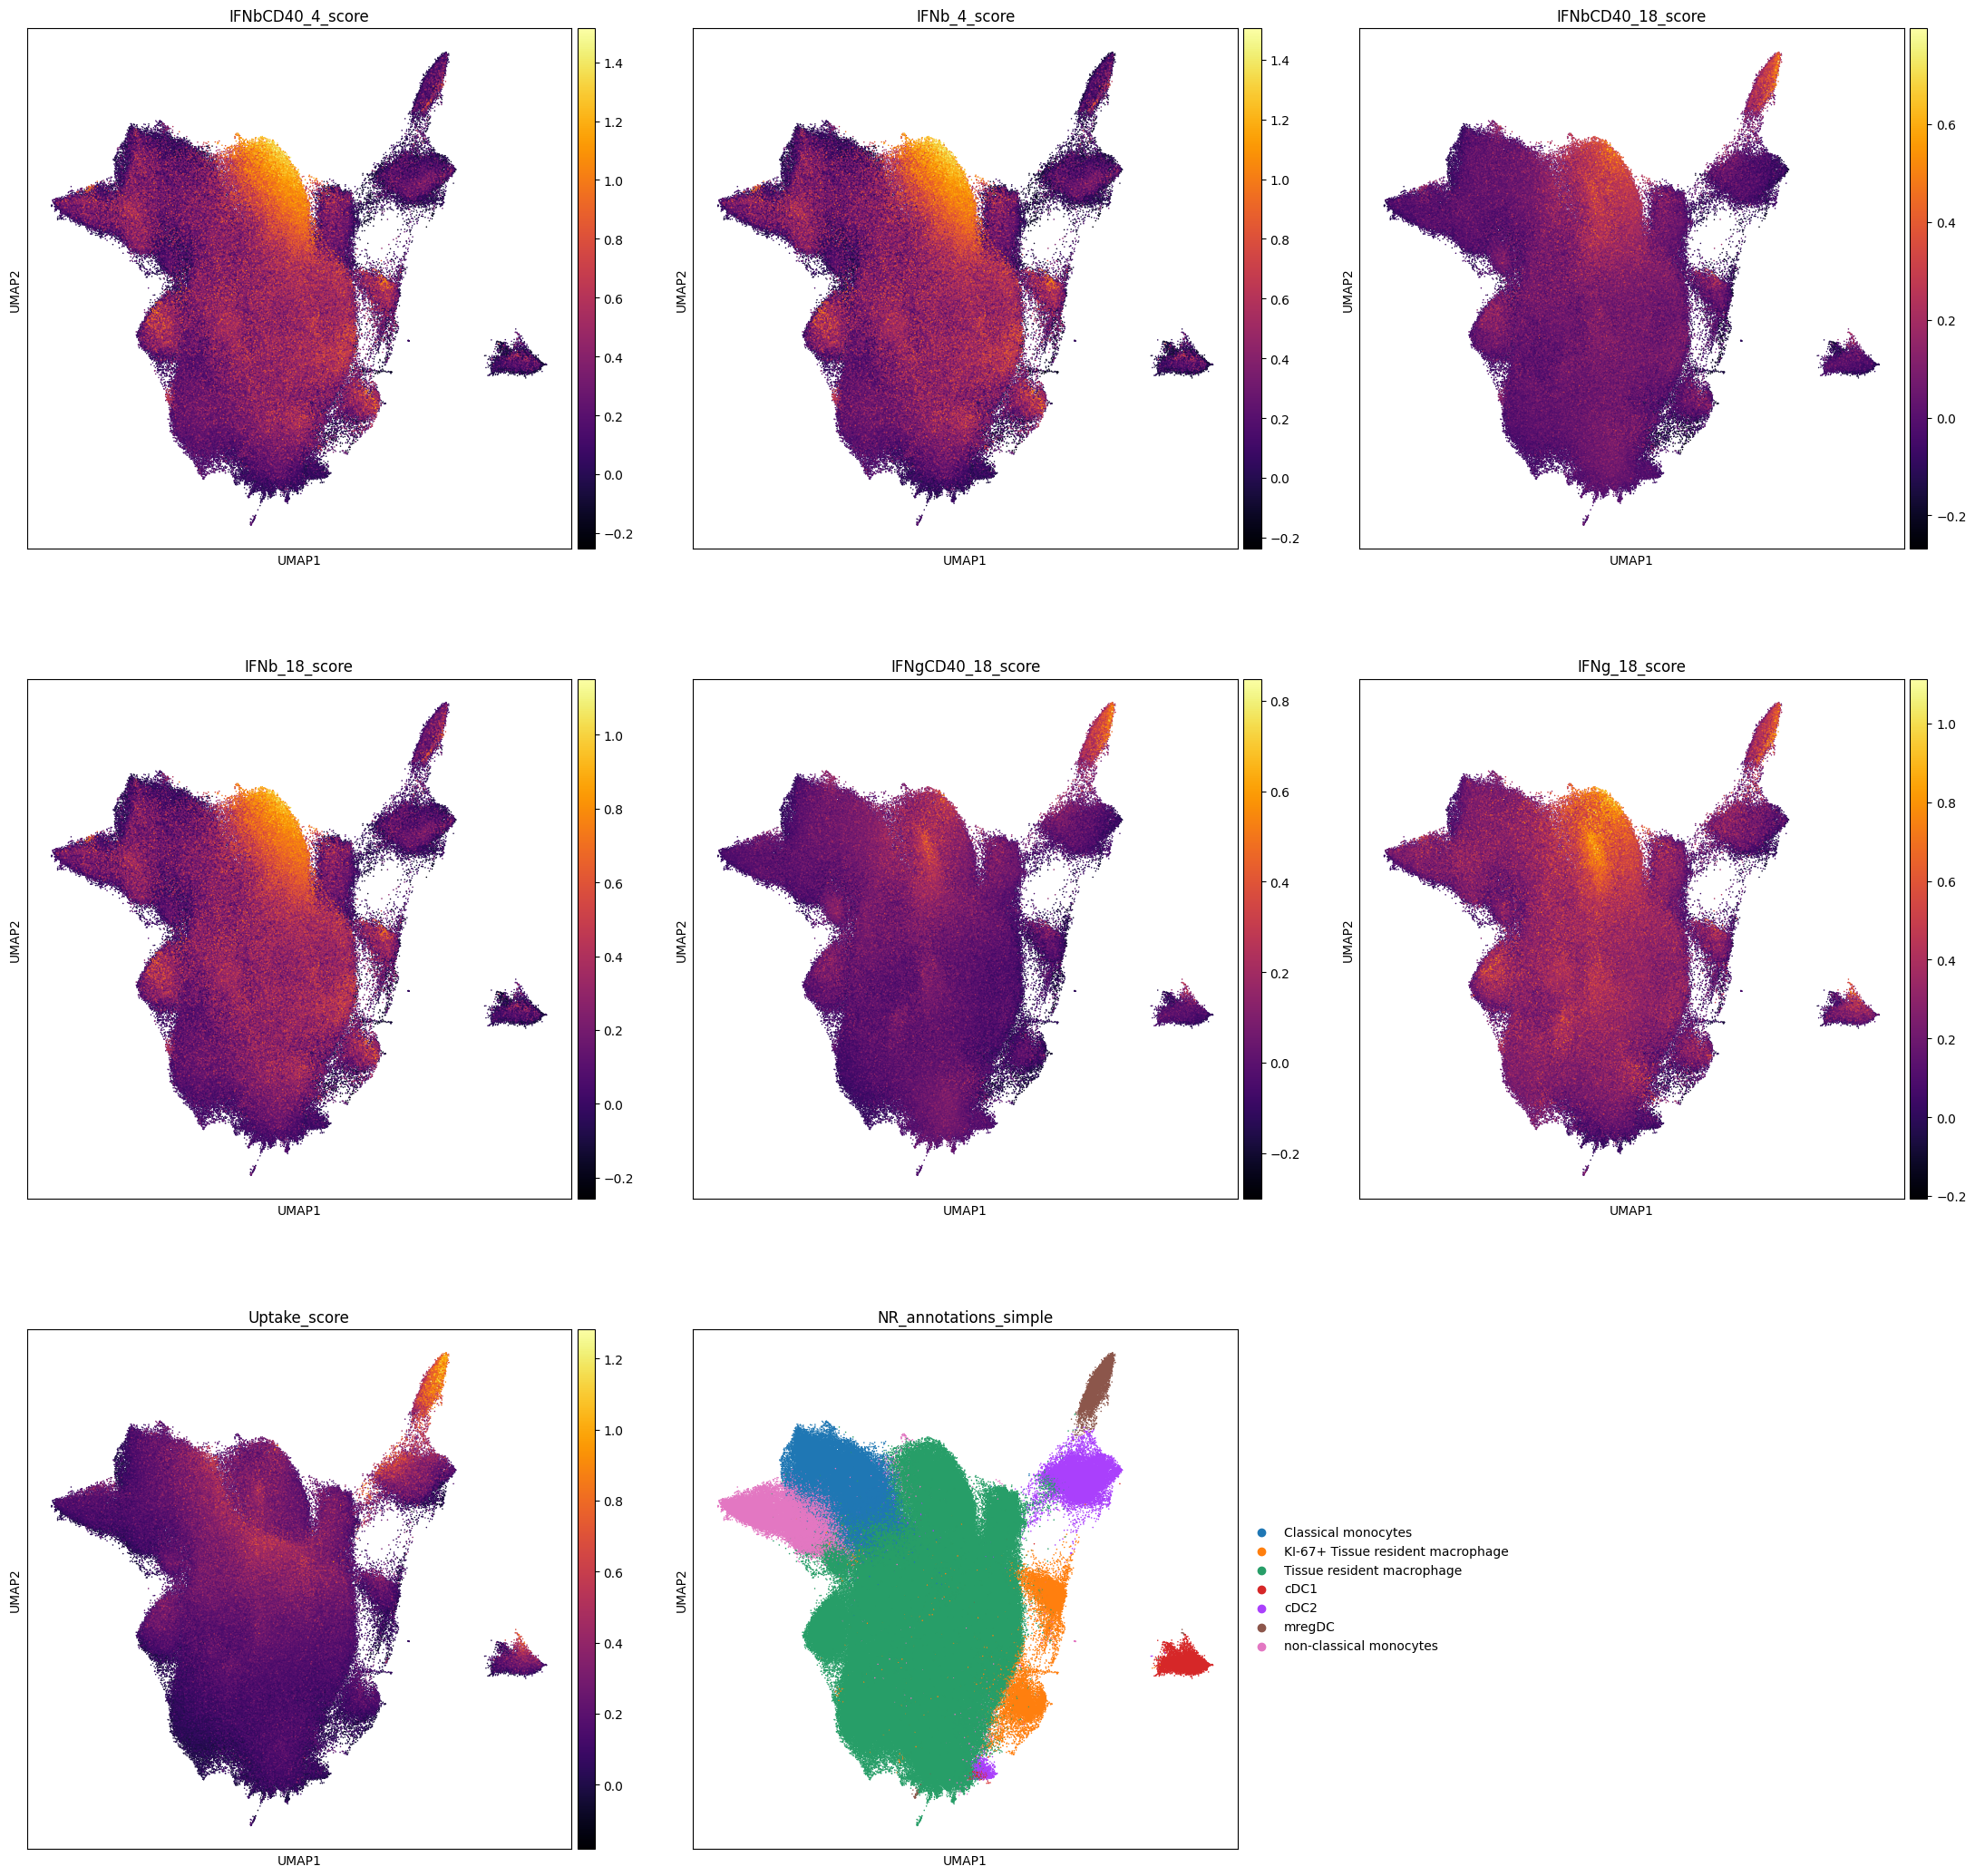

In [14]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=3, size=5, color_map="inferno")

# DC only visualisation

In [23]:
# read in data
data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [24]:
#make an object with my sig - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [25]:
#score genes
sc.tl.score_genes(data_DC, Uptake_sig, score_name='Uptake_score')

In [26]:
colour_vars = ["Uptake_score","NR_annotations_simple"]

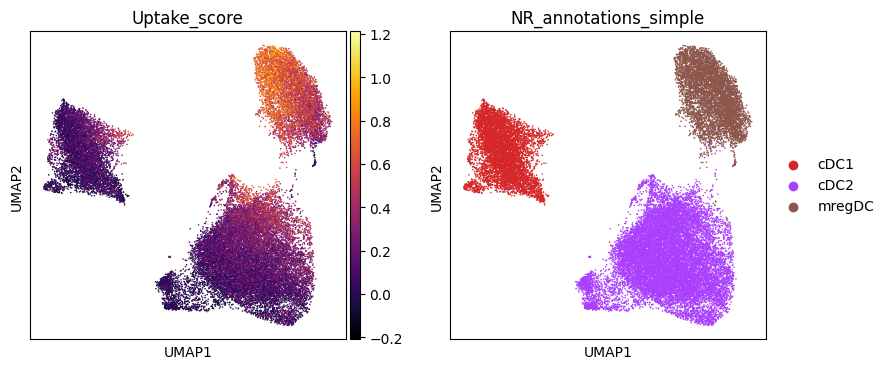

In [28]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=2, size=5, color_map="inferno")

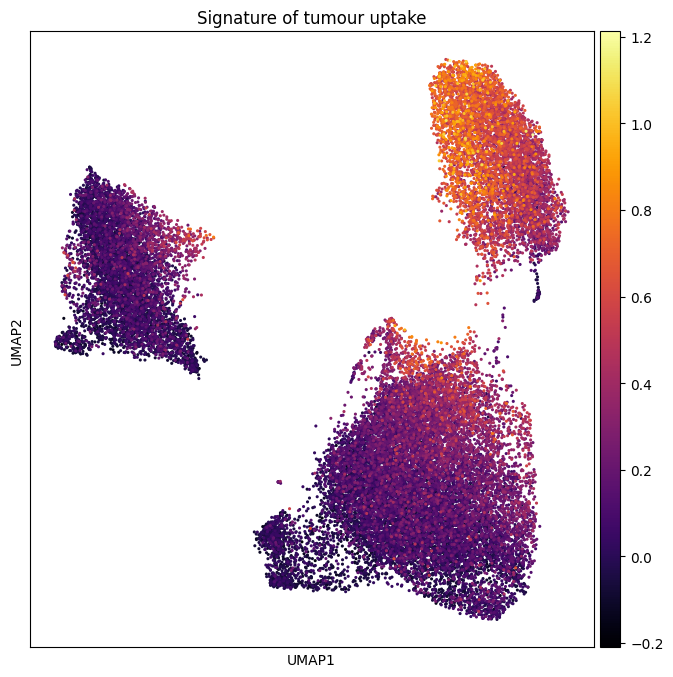

In [33]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data_DC, color="Uptake_score", ncols=1, size=20, color_map="inferno", title="Signature of tumour uptake")